In [1]:
import numpy as np
import re
import matplotlib.pyplot as plt
import collections

In [2]:
nodes=open("nodes.txt")
nodes_list=[]
for i in nodes.readlines():
    tmp=re.split(r'\s+',i)
    nodes_list+=[[tmp[1],tmp[2],tmp[3]]]
    
nodes=open("tetra.txt")
tetra_list=[]
for i in nodes.readlines():
    tmp=re.split(r'\s+',i)
    tetra_list+=[[tmp[1],tmp[2],tmp[3],tmp[4]]]    

In [3]:
nodes=np.array(nodes_list).astype("float")
tetra=np.array(tetra_list).astype("float")
print("Number nodes :",len(nodes))
print("Number tetra :",len(tetra))

Number nodes : 224
Number tetra : 798


In [5]:
# number of edges
edge_list=set()
for i in tetra:
    edge_list.add(tuple(sorted((i[0],i[1]))))
    edge_list.add(tuple(sorted((i[0],i[2]))))
    edge_list.add(tuple(sorted((i[0],i[3]))))
    edge_list.add(tuple(sorted((i[1],i[2]))))
    edge_list.add(tuple(sorted((i[1],i[3]))))
    edge_list.add(tuple(sorted((i[2],i[3]))))
print("Number edges :",np.sum([value for key,value in dict(collections.Counter(edge_list)).items()]))

Number edges : 1163


In [19]:
a=set([1])
a.union([1,2,3])

{1, 2, 3}

In [28]:
tmp=[[1,2,3],[0,2,3],[0,1,3],[0,1,2]]
neigbours={}
for i in tetra:
    for ind,j in enumerate(i):
        if j not in neigbours:
            neigbours[j]=set(i[tmp[ind]].tolist())
        else:
            neigbours[j]=neigbours[j].union(set(i[tmp[ind]].tolist()))

np.mean([len(val) for key,val in neigbours.items()])

10.768518518518519

Average Degree : 14.223214285714286


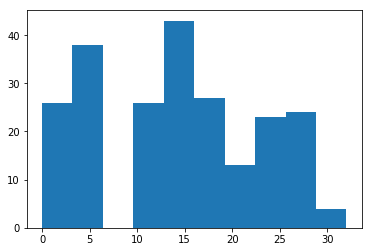

In [6]:
# average degree
print("Average Degree :",np.mean([len(tetra[tetra==i]) for i in range(len(nodes))]))
plt.hist([len(tetra[tetra==i]) for i in range(len(nodes))])
plt.show()

Number of tetra per edge : 4.116938950988822


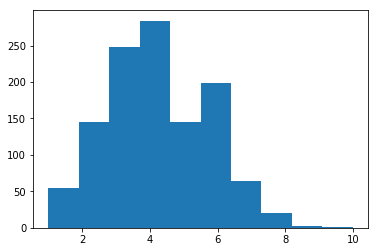

In [7]:
# number of tetra per edge
edge_list=[]
for i in tetra:
    edge_list.append(tuple(sorted((i[0],i[1]))))
    edge_list.append(tuple(sorted((i[0],i[2]))))
    edge_list.append(tuple(sorted((i[0],i[3]))))
    edge_list.append(tuple(sorted((i[1],i[2]))))
    edge_list.append(tuple(sorted((i[1],i[3]))))
    edge_list.append(tuple(sorted((i[2],i[3]))))
print("Number of tetra per edge :",np.mean([value for key,value in dict(collections.Counter(edge_list)).items()]))
plt.hist([value for key,value in dict(collections.Counter(edge_list)).items()])
plt.show()

Number of faces per tetra : 3192


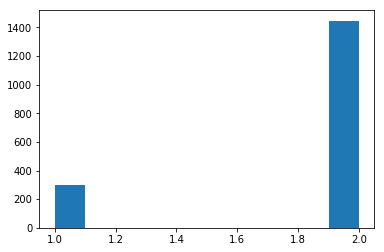

In [8]:
# number of faces per tetra
face_list=[]
for i in tetra:
    face_list.append(tuple(sorted((i[0],i[1],i[2]))))
    face_list.append(tuple(sorted((i[0],i[2],i[3]))))
    face_list.append(tuple(sorted((i[1],i[2],i[3]))))
    face_list.append(tuple(sorted((i[0],i[1],i[3]))))
print("Number of faces per tetra :",np.sum([value for key,value in dict(collections.Counter(face_list)).items()]))
plt.hist([value for key,value in dict(collections.Counter(face_list)).items()])
plt.show()